3월 2일 기준 데이터입니다.

In [51]:
import pandas as pd
import numpy as np
import matplotlib; matplotlib.rc('font', family='Malgun Gothic')
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings; warnings.filterwarnings('ignore')

plt.style.use('ggplot')

- id: 확진자의 id (n번째 확진자)
- sex: 성별
- birth_year: 출생 연도
- country: 국적
- region: 주 활동 지역 (광역시/도 단위)
- group: 특정 집단 관련
- infection_reason: 감염 경로
- infection_order: 감염 차수 (n차 감염)
- infected_by: 해당 확진자의 감염원 id
- contact_number: 접촉자 수
- confirmed_date: 확진 일자
- released_date: 퇴원 일자 (격리 해제 일자)
- deceased_date: 사망 일자
- state: 상태

In [52]:
raw_df = pd.read_csv('../corona/patient.csv')
print(raw_df.shape)
raw_df.head()

(4812, 14)


,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,NaN,NaN,isolated


In [53]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                4812 non-null   int64  
 1   sex               326 non-null    object 
 2   birth_year        299 non-null    float64
 3   country           4812 non-null   object 
 4   region            313 non-null    object 
 5   group             76 non-null     object 
 6   infection_reason  130 non-null    object 
 7   infection_order   35 non-null     float64
 8   infected_by       62 non-null     float64
 9   contact_number    32 non-null     float64
 10  confirmed_date    4812 non-null   object 
 11  released_date     28 non-null     object 
 12  deceased_date     20 non-null     object 
 13  state             4812 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 526.4+ KB


In [54]:
# id는 범주형 변수이므로 데이터 타입을 바꾼다
raw_df['id'] = raw_df['id'].astype(str)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                4812 non-null   object 
 1   sex               326 non-null    object 
 2   birth_year        299 non-null    float64
 3   country           4812 non-null   object 
 4   region            313 non-null    object 
 5   group             76 non-null     object 
 6   infection_reason  130 non-null    object 
 7   infection_order   35 non-null     float64
 8   infected_by       62 non-null     float64
 9   contact_number    32 non-null     float64
 10  confirmed_date    4812 non-null   object 
 11  released_date     28 non-null     object 
 12  deceased_date     20 non-null     object 
 13  state             4812 non-null   object 
dtypes: float64(4), object(10)
memory usage: 526.4+ KB


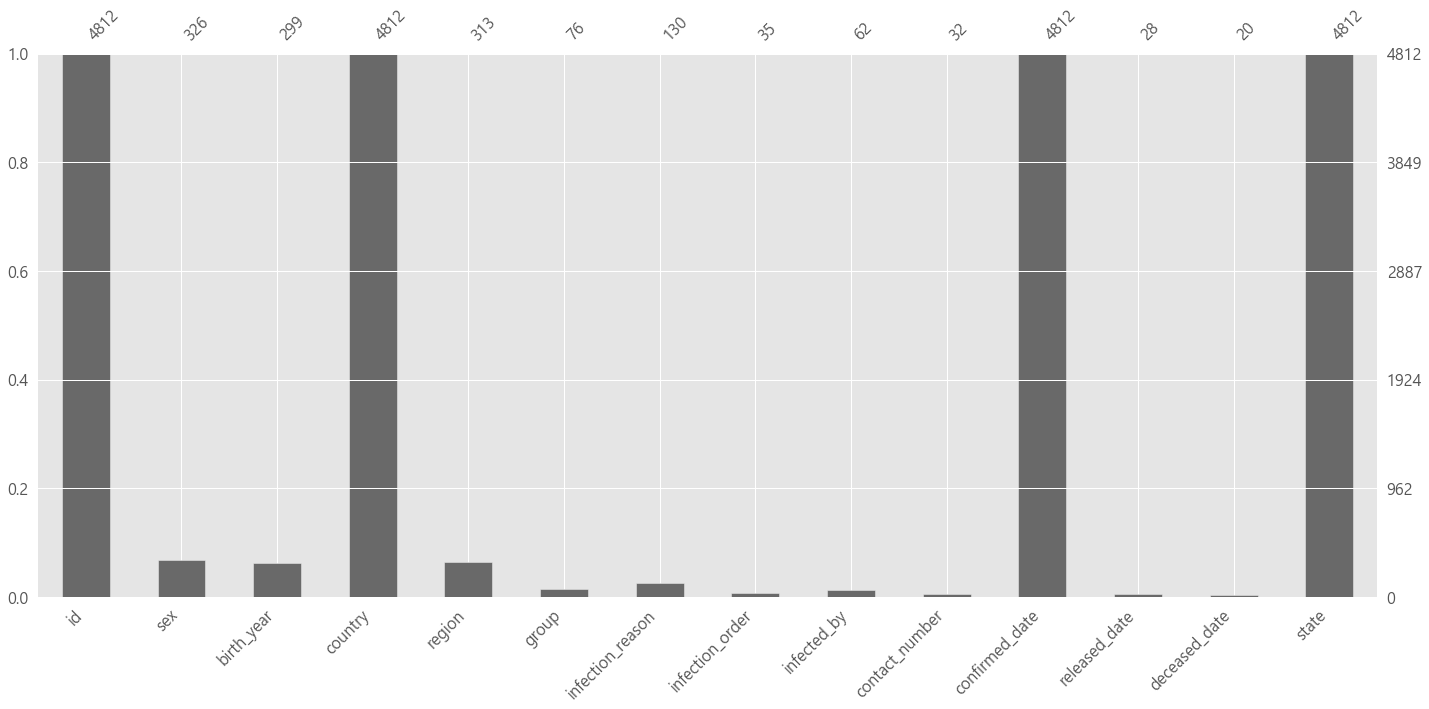

In [55]:
msno.bar(raw_df)

- 일단 결측치가 매우 많음  
- 전염 원인(infection reason) 컬럼의 결측치도 매우 많은 것으로 보아 전염된 이유(전염 경로)를 확인하지 못한 케이스가 많다고 추측됨  
- 그 외의 다른 컬럼들에도 결측치가 많음

In [56]:
raw_df.describe(include='all')

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
count,4812,326,299.000000,4812,313,76,130,35.000000,62.000000,32.000000,4812,28,20,4812
unique,4812,2,NaN,3,14,6,11,NaN,NaN,NaN,28,15,11,3
top,109,female,NaN,Korea,Gyeongsangbuk-do,Shincheonji Church,contact with patient,NaN,NaN,NaN,2020-03-01,2020-02-19,2020-02-23,isolated
freq,1,167,NaN,4803,120,51,66,NaN,NaN,NaN,1062,4,4,4764
mean,NaN,NaN,1972.712375,NaN,NaN,NaN,NaN,2.257143,330.741935,96.843750,NaN,NaN,NaN,NaN
std,NaN,NaN,17.589967,NaN,NaN,NaN,NaN,1.357828,458.786744,224.669522,NaN,NaN,NaN,NaN
min,NaN,NaN,1934.000000,NaN,NaN,NaN,NaN,1.000000,3.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,1959.000000,NaN,NaN,NaN,NaN,1.000000,29.250000,2.750000,NaN,NaN,NaN,NaN
50%,NaN,NaN,1971.000000,NaN,NaN,NaN,NaN,2.000000,126.000000,16.500000,NaN,NaN,NaN,NaN
75%,NaN,NaN,1987.000000,NaN,NaN,NaN,NaN,3.000000,372.000000,69.750000,NaN,NaN,NaN,NaN


In [57]:
# 각 컬럼의 결측치 개수
raw_df.isnull().sum().to_frame().T

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,0,4486,4513,0,4499,4736,4682,4777,4750,4780,0,4784,4792,0


## 각 컬럼 살펴보기(cleaning)

### sex

['female' 'male' nan]


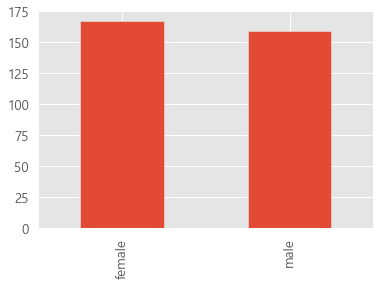

In [58]:
print(raw_df['sex'].unique())
plt.style.use('ggplot')
raw_df['sex'].value_counts().plot.bar()

In [59]:
raw_df.head()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,NaN,NaN,isolated


### bitrh_year

In [60]:
raw_df['birth_year'].value_counts()

1985.0    12
1956.0    10
1962.0    10
1968.0     9
1997.0     9
          ..
1947.0     1
1937.0     1
1952.0     1
1940.0     1
1934.0     1
Name: birth_year, Length: 69, dtype: int64

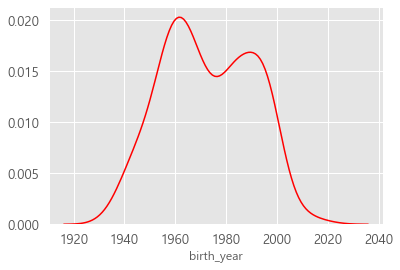

In [61]:
sns.distplot(raw_df['birth_year'], hist=False, color='red')

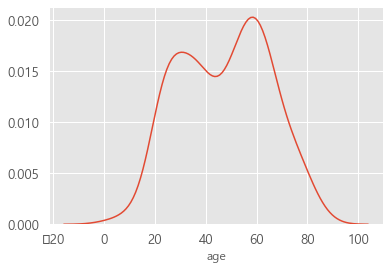

In [62]:
# birth_year 대신 age 컬럼을 새로 만들겠다
# raw_df['birth_year'] = raw_df['birth_year'].astype(float).map(lambda x: x if x>0 else np.nan)
raw_df['age'] = pd.datetime.now().year - raw_df['birth_year']
sns.distplot(raw_df['age'], hist=False)

In [63]:
raw_df.drop(['birth_year'], axis=1, inplace=True)
raw_df.head(3)

,id,sex,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age
0,1,female,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released,36.0
1,2,male,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released,56.0
2,3,male,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released,54.0


### country & region

In [64]:
raw_df.isnull().sum().to_frame().T

,id,sex,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age
0,0,4486,0,4499,4736,4682,4777,4750,4780,0,4784,4792,0,4513


In [65]:
print(raw_df['country'].value_counts()); print('------------------------')
print(raw_df['region'].value_counts())
raw_df[['country', 'region']].head()

Korea       4803
China          8
Mongolia       1
Name: country, dtype: int64
------------------------
Gyeongsangbuk-do       120
capital area           110
Daegu                   39
Gwangju                 10
Daejeon                 10
Gangwon-do               5
Jeollabuk-do             4
filtered at airport      4
Chungcheongnam-do        2
Chungcheongbuk-do        2
Ulsan                    2
Busan                    2
Jeju-do                  2
Dague                    1
Name: region, dtype: int64


,country,region
0,China,filtered at airport
1,Korea,filtered at airport
2,Korea,capital area
3,Korea,capital area
4,Korea,capital area


- region 컬럼의 Gyeongsangbuk-do를 Gyeongbuk으로 
- capital area를 capital로
- Dague를 Daegu로
- Gangwon-do를 Gangwon으로  
- Jeollabuk-do를 Jeonbuk으로 
- Jeju-do를 Jeju로
- Daejeon, Daejon을 Daejeon 하나로  
- Chungcheongnam-do와 Chungcheongbuk-do를 하나로 합쳐 Chungcheong으로  

In [66]:
def region_clean(df):
    if pd.isnull(df):
        return np.nan
    else:
        return df.replace('Gyeongsangbuk-do', 'Gyeongbuk').\
    replace('capital area', 'Capital').replace('Dague', 'Daegu').\
    replace('Gangwon-do', 'Gangwon').replace('Jeollabuk-do', 'Jeonbuk').\
    replace('Jeju-do', 'Jeju').replace('Chungcheongbuk-do', 'Chungcheong').\
    replace('Chungcheongnam-do', 'Chungcheong')
    
raw_df['region'] = raw_df['region'].apply(region_clean)
raw_df['region'].value_counts()

Gyeongbuk              120
Capital                110
Daegu                   40
Gwangju                 10
Daejeon                 10
Gangwon                  5
Chungcheong              4
Jeonbuk                  4
filtered at airport      4
Jeju                     2
Ulsan                    2
Busan                    2
Name: region, dtype: int64

In [67]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import cufflinks as cf 
cf.go_offline(connected=True)

raw_df['region'].iplot(kind='hist', linecolor='blue')

### group, infection_reason, infection_order, infected_by

In [68]:
raw_df.head()

,id,sex,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age
0,1,female,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released,36.0
1,2,male,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released,56.0
2,3,male,Korea,Capital,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released,54.0
3,4,male,Korea,Capital,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released,56.0
4,5,male,Korea,Capital,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,NaN,NaN,isolated,33.0


In [69]:
print(raw_df['group'].value_counts()); print('--------------------')
print(raw_df['infection_reason'].value_counts()); print('------------------')
print(raw_df['infection_order'].value_counts()); print('---------------------')
print(raw_df['infected_by'].value_counts())

Shincheonji Church               51
Cheongdo Daenam Hospital          9
Eunpyeong St. Mary's Hospital     8
Pilgrimage                        6
Myungsung church                  1
Onchun Church                     1
Name: group, dtype: int64
--------------------
contact with patient                 66
visit to Daegu                       40
visit to Wuhan                        8
pilgrimage to Israel                  6
residence in Wuhan                    2
visit to Thailand                     2
contact with patient in Singapore     2
visit to Cheongdo Daenam Hospital     1
contact with patient in Japan         1
visit to China                        1
visit to Vietnam                      1
Name: infection_reason, dtype: int64
------------------
1.0    13
2.0    10
3.0     6
4.0     3
5.0     2
6.0     1
Name: infection_order, dtype: int64
---------------------
31.0      8
6.0       4
126.0     3
83.0      3
372.0     3
335.0     2
246.0     2
27.0      2
16.0      2
3.0       2
780

In [70]:
def infection_reason_clean(df):
    if pd.isnull(df):
        return np.nan
    if 'Wuhan' in df:
        return 'Wuhan'
    if 'Daegu' in df:
        return 'Daegu'
    if 'Israel' in df: 
        return 'Abroad'
    if 'Thailand' in df:
        return 'Abroad'
    if 'Singapore' in df:
        return 'Abroad'
    if 'Vietnam' in df:
        return 'Abroad'
    if 'Japan' in df:
        return 'Abroad'
    if 'China' in df:
        return 'Abroad'
    if 'Cheongdo' in df:
        return 'Cheongo Daenam hospital'
    else:
        return df
        
raw_df['infection_reason'] = raw_df['infection_reason'].apply(infection_reason_clean)
raw_df['infection_reason'].value_counts()

contact with patient       66
Daegu                      40
Abroad                     13
Wuhan                      10
Cheongo Daenam hospital     1
Name: infection_reason, dtype: int64

Text(0.5, 1.0, 'infection order')

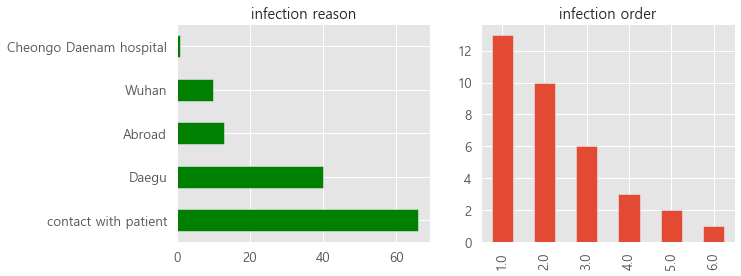

In [71]:
fig = plt.figure(figsize=(10, 4))

fig.add_subplot(1, 2, 1)
raw_df['infection_reason'].value_counts().plot.barh(color='green')
plt.title('infection reason')
fig.add_subplot(1, 2, 2)
raw_df['infection_order'].value_counts().plot.bar()
plt.title('infection order')

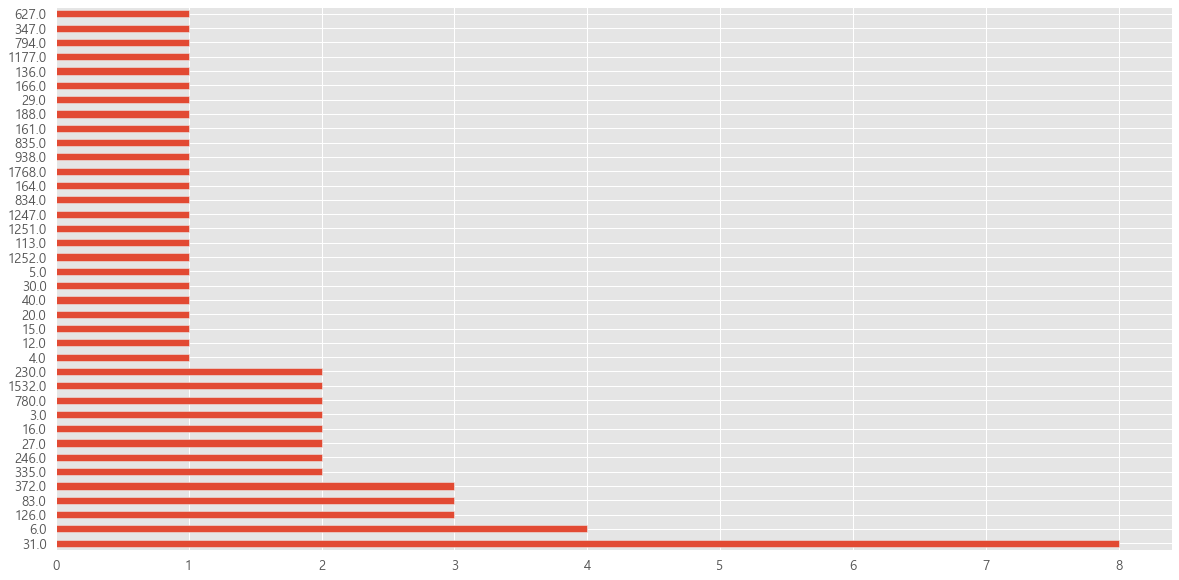

In [72]:
raw_df['infected_by'].value_counts().plot(kind='barh', figsize=(20,10))

In [73]:
raw_df.head()

,id,sex,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age
0,1,female,China,filtered at airport,NaN,Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released,36.0
1,2,male,Korea,filtered at airport,NaN,Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released,56.0
2,3,male,Korea,Capital,NaN,Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released,54.0
3,4,male,Korea,Capital,NaN,Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released,56.0
4,5,male,Korea,Capital,NaN,Wuhan,1.0,NaN,31.0,2020-01-30,NaN,NaN,isolated,33.0


### contact_number, state

In [74]:
print(raw_df['contact_number'].value_counts())
raw_df['contact_number'].value_counts().iplot(kind='bar')

0.0       4
2.0       2
8.0       2
1.0       2
95.0      1
43.0      1
16.0      1
17.0      1
9.0       1
3.0       1
15.0      1
6.0       1
12.0      1
40.0      1
113.0     1
75.0      1
422.0     1
31.0      1
68.0      1
23.0      1
27.0      1
450.0     1
117.0     1
290.0     1
1160.0    1
45.0      1
Name: contact_number, dtype: int64


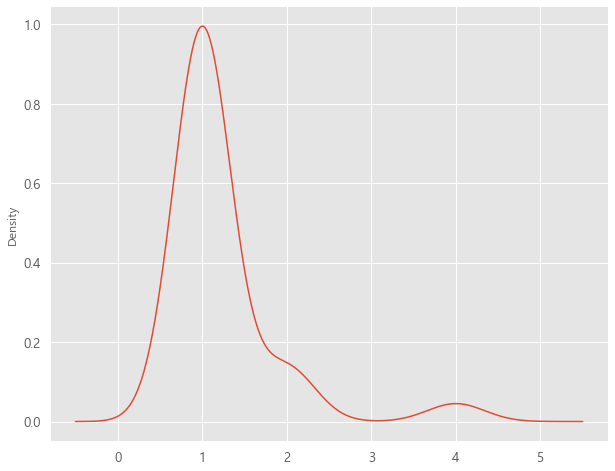

In [75]:
plt.figure(figsize=(10,8))
raw_df['contact_number'].value_counts().plot.kde()

Text(0.5, 1.0, 'state')

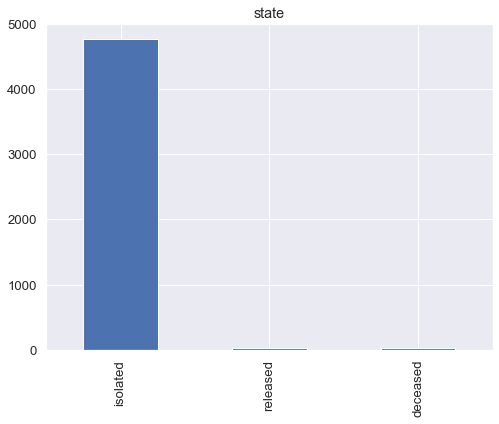

In [76]:
sns.set(font_scale=1.2)
raw_df['state'].value_counts().plot.bar(figsize=(8,6))
plt.title('state')

In [77]:
table = pd.pivot_table(data=raw_df,
               index='id',
              values='contact_number',
              aggfunc='sum')
table = table[table['contact_number'] > 0]
table

,contact_number
id,
1,45.0
10,43.0
12,422.0
14,3.0
15,15.0
16,450.0
17,290.0
18,8.0
19,68.0


In [78]:
raw_df.head()

,id,sex,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age
0,1,female,China,filtered at airport,NaN,Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released,36.0
1,2,male,Korea,filtered at airport,NaN,Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released,56.0
2,3,male,Korea,Capital,NaN,Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released,54.0
3,4,male,Korea,Capital,NaN,Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released,56.0
4,5,male,Korea,Capital,NaN,Wuhan,1.0,NaN,31.0,2020-01-30,NaN,NaN,isolated,33.0


### confirmed_date, released_date, deceased_date

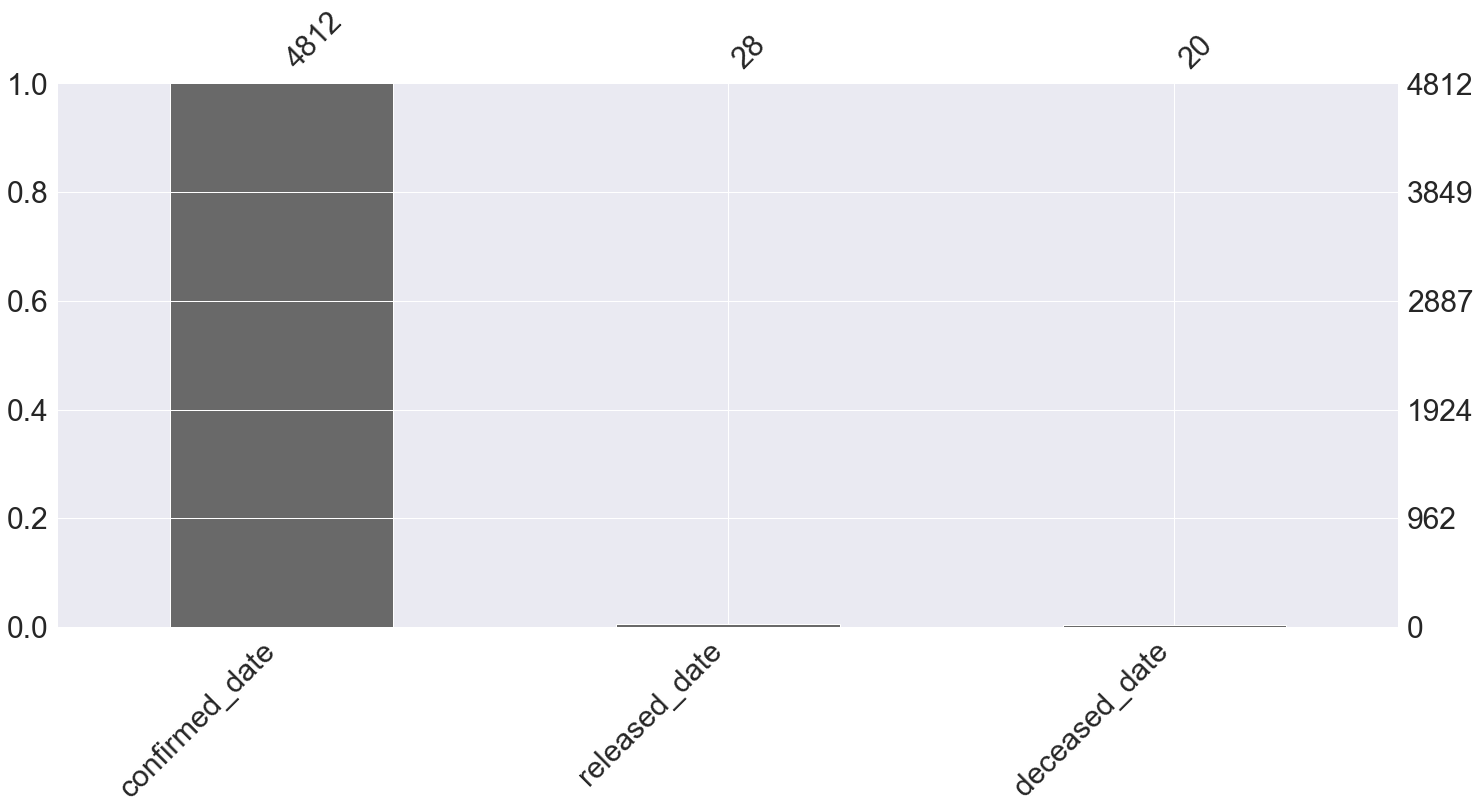

In [79]:
msno.bar(raw_df[['confirmed_date', 'released_date', 'deceased_date']],
        fontsize=30)

In [80]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                4812 non-null   object 
 1   sex               326 non-null    object 
 2   country           4812 non-null   object 
 3   region            313 non-null    object 
 4   group             76 non-null     object 
 5   infection_reason  130 non-null    object 
 6   infection_order   35 non-null     float64
 7   infected_by       62 non-null     float64
 8   contact_number    32 non-null     float64
 9   confirmed_date    4812 non-null   object 
 10  released_date     28 non-null     object 
 11  deceased_date     20 non-null     object 
 12  state             4812 non-null   object 
 13  age               299 non-null    float64
dtypes: float64(4), object(10)
memory usage: 526.4+ KB


In [81]:
raw_df['confirmed_date'] = pd.to_datetime(raw_df['confirmed_date'])
raw_df['released_date'] = pd.to_datetime(raw_df['released_date'])
raw_df['deceased_date'] = pd.to_datetime(raw_df['deceased_date'])
raw_df.dtypes

id                          object
sex                         object
country                     object
region                      object
group                       object
infection_reason            object
infection_order            float64
infected_by                float64
contact_number             float64
confirmed_date      datetime64[ns]
released_date       datetime64[ns]
deceased_date       datetime64[ns]
state                       object
age                        float64
dtype: object

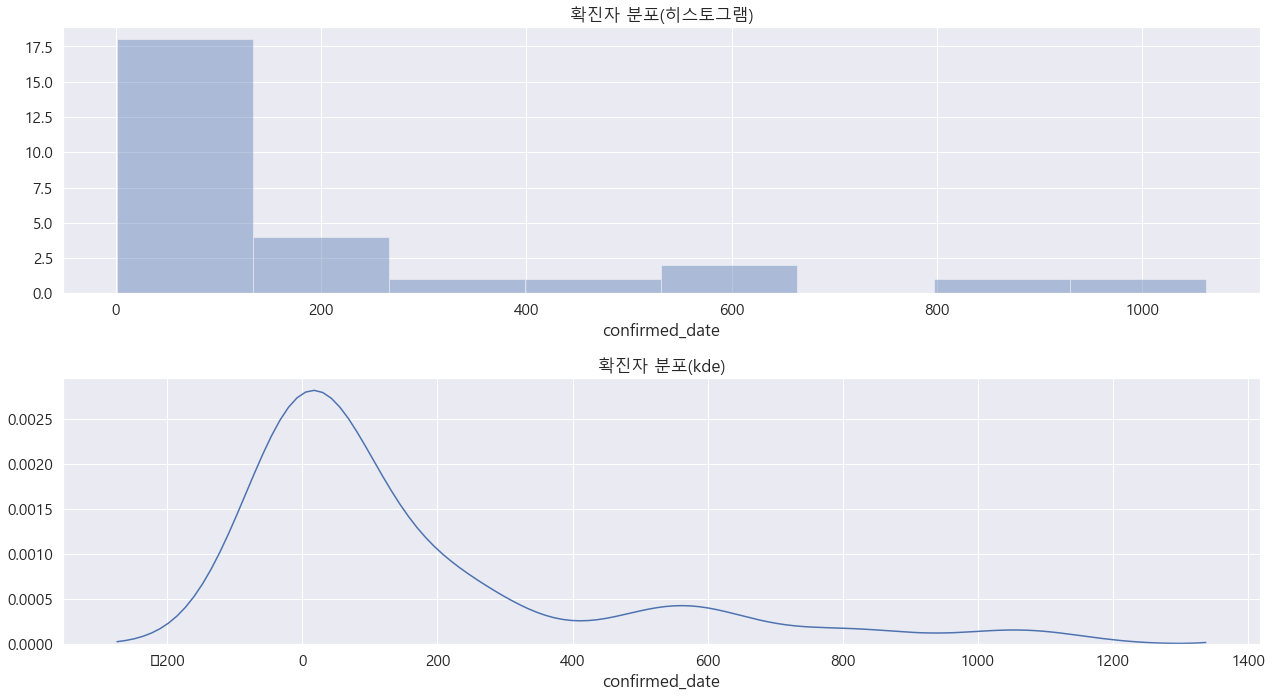

In [146]:
sns.set(font_scale=1.4)
plt.rc('font', family='Malgun Gothic')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18,10))
sns.distplot(raw_df['confirmed_date'].value_counts(), kde=False, ax=ax1)
sns.distplot(raw_df['confirmed_date'].value_counts(), bins=3, hist=False, ax=ax2)
ax1.set_title('확진자 분포(히스토그램)')
ax2.set_title('확진자 분포(kde)')
plt.tight_layout()

## 컬럼 순서 변경

In [82]:
# 편의상 컬럼 순서 변경!
raw_df.head()

,id,sex,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state,age
0,1,female,China,filtered at airport,NaN,Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaT,released,36.0
1,2,male,Korea,filtered at airport,NaN,Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaT,released,56.0
2,3,male,Korea,Capital,NaN,Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaT,released,54.0
3,4,male,Korea,Capital,NaN,Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaT,released,56.0
4,5,male,Korea,Capital,NaN,Wuhan,1.0,NaN,31.0,2020-01-30,NaT,NaT,isolated,33.0


In [83]:
raw_df.columns.tolist()

['id',
 'sex',
 'country',
 'region',
 'group',
 'infection_reason',
 'infection_order',
 'infected_by',
 'contact_number',
 'confirmed_date',
 'released_date',
 'deceased_date',
 'state',
 'age']

In [84]:
col = raw_df.columns[[0, 12, 13, 1, 2, 3, 9, 10, 11, 4, 5, 7, 8, 6]]
df = raw_df[col].copy()
print(df.shape)
df.head()

(4812, 14)


,id,state,age,sex,country,region,confirmed_date,released_date,deceased_date,group,infection_reason,infected_by,contact_number,infection_order
0,1,released,36.0,female,China,filtered at airport,2020-01-20,2020-02-06,NaT,NaN,Wuhan,NaN,45.0,1.0
1,2,released,56.0,male,Korea,filtered at airport,2020-01-24,2020-02-05,NaT,NaN,Wuhan,NaN,75.0,1.0
2,3,released,54.0,male,Korea,Capital,2020-01-26,2020-02-12,NaT,NaN,Wuhan,NaN,16.0,1.0
3,4,released,56.0,male,Korea,Capital,2020-01-27,2020-02-09,NaT,NaN,Wuhan,NaN,95.0,1.0
4,5,isolated,33.0,male,Korea,Capital,2020-01-30,NaT,NaT,NaN,Wuhan,NaN,31.0,1.0


In [131]:
df.to_csv('../corona/corona(kaggle)_update_data.csv')

## 추이

In [85]:
len(df.id.unique())

4812

In [86]:
confirm = pd.pivot_table(data=df,
                        index='confirmed_date',
                        values='id',
                        aggfunc=len)
confirm.rename(columns={'id':'count'}, inplace=True)
confirm

,count
confirmed_date,
2020-01-20,1
2020-01-24,1
2020-01-26,1
2020-01-27,1
2020-01-30,3
2020-01-31,4
2020-02-01,1
2020-02-02,3
2020-02-04,1


In [87]:
confirm.iplot(kind='line',
             xTitle='날짜',
             yTitle='확진자수',
             title='확진자 추이',
             theme=cf.set_config_file(theme='solar'))

Text(0.5, 0, '2020.01.26~2020.03.02')

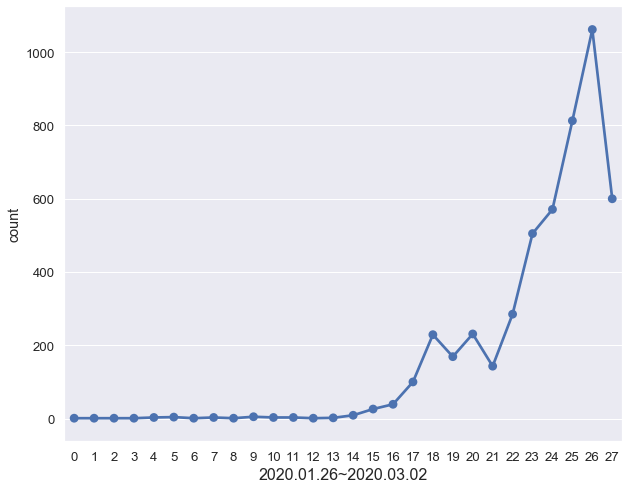

In [88]:
plt.figure(figsize=(10,8))
sns.pointplot(data=confirm.reset_index(), x=np.arange(len(confirm.reset_index()['confirmed_date'])), y='count')
plt.xlabel('2020.01.26~2020.03.02',
          fontdict={'size':16})

In [169]:
release = df.groupby('released_date')['id'].count().to_frame()
decease = df.groupby('deceased_date')['id'].count().to_frame()

In [184]:
confirm_reset = confirm.reset_index()
release_reset = release.reset_index()
decease_reset = decease.reset_index()
data_merged = confirm_reset.merge(release_reset,
                    how='inner',
                    left_on='confirmed_date',
                    right_on='released_date', ).\
merge(decease_reset,
     how='inner', left_on='released_date', right_on='deceased_date')

data_merged.drop(columns=['released_date', 'deceased_date'], axis=1, inplace=True)
data_merged.columns = ['date', 'confirmed', 'released', 'deceased']
data_merged

,date,confirmed,released,deceased
0,2020-02-19,26,4,1
1,2020-02-21,100,1,1
2,2020-02-24,231,4,2
3,2020-02-26,285,2,1
4,2020-02-27,505,2,1


In [191]:
data_merged.set_index('date').iplot(kind='box')

In [195]:
data_merged.set_index('date').iplot(kind='barh')

In [200]:
cf.set_config_file(theme='ggplot')
data_merged.set_index('date').iplot(kind='surface')

In [203]:
data_merged.set_index('date').iplot(kind='spread')

## 확진자 예측

Text(0.5, 1.0, '확진자 누적 추이')

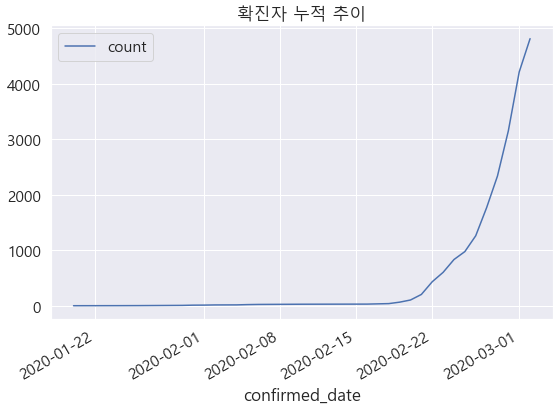

In [204]:
plt.rc('font', family='Malgun Gothic')
confirm.cumsum().plot(figsize=(9,6))
plt.title('확진자 누적 추이')

#### - ARIMA로 예측해보기

In [90]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

confirm_cumsum = confirm.cumsum()
# confirm_cumsum = confirm_cumsum['count'].astype(float).to_frame()
confirm_cumsum.tail()

,count
confirmed_date,
2020-02-27,1766
2020-02-28,2337
2020-02-29,3150
2020-03-01,4212
2020-03-02,4812


In [91]:
model = ARIMA(confirm_cumsum['count'].values, order=(1, 2, 1))
fit_model = model.fit(trend='c', full_output=True, disp=True)
fit_model.summary()
# 계수들의 p-value 값이 유의수준 0.05보다 작음. AR=1, MA=1, 차분=2로 설정하는 것 유의미하다고 보여짐.

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                   26
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -162.246
Method:                       css-mle   S.D. of innovations            120.786
Date:                Thu, 05 Mar 2020   AIC                            332.492
Time:                        01:35:23   BIC                            337.524
Sample:                             2   HQIC                           333.941
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.6477      9.858      2.602      0.016       6.326      44.970
ar.L1.D2.y     0.7851      0.145      5.413      0.000       0.501       1.069
ma.L1.D2.y    -1.0000      0.112     -8.911      0.000      -1.220      -0.780
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2737           +0.0000j            1.2737            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

Text(0.5, 1.0, '실제값과 예측값의 오차 변동')

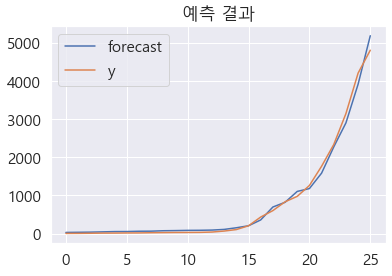

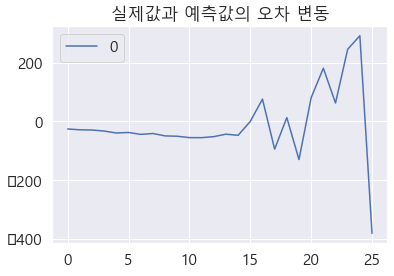

In [205]:
plt.rc('font', family='Malgun Gothic')
fit_model.plot_predict()
plt.title('예측 결과')
pd.DataFrame(fit_model.resid).plot()
plt.title('실제값과 예측값의 오차 변동')

####  - 이 ARIMA 모델로 3월 3일부터 9일까지 누적 확진자 수 예측

In [93]:
forcast = fit_model.forecast(steps=7)
pred_y = forcast[0].tolist()
pred_y

[5435.344249197349,
 6082.527715558479,
 6753.939008212842,
 7449.883231865668,
 8170.59993024894,
 8916.27717387927,
 9687.062620634932]

In [94]:
pd.DataFrame(data=pred_y,
             index=['3/3', '3/4', '3/5', '3/6', '3/7', '3/8', '3/9'],
            columns=['confirmed_count(cumsum)'])

,confirmed_count(cumsum)
3/3,5435.344249
3/4,6082.527716
3/5,6753.939008
3/6,7449.883232
3/7,8170.599930
3/8,8916.277174
3/9,9687.062621


**3월 4일 오후 11시 30분 기준으로 실제 누적 확진자 수는 5621명**  
ARIMA 모델로 예측한 값과 실제 값 사이에 오차가 있음

### fbprophet으로 예측

In [95]:
from fbprophet import Prophet

In [96]:
fb_data = confirm_cumsum.reset_index()
fb_data.columns = ['ds','y']
fb_data

,ds,y
0,2020-01-20,1
1,2020-01-24,2
2,2020-01-26,3
3,2020-01-27,4
4,2020-01-30,7
5,2020-01-31,11
6,2020-02-01,12
7,2020-02-02,15
8,2020-02-04,16
9,2020-02-05,21


In [127]:
prophet = Prophet(growth='linear',
                  seasonality_mode='multiplicative',
                  yearly_seasonality=True,
                  weekly_seasonality=True,
                  daily_seasonality=True,
                  changepoint_range=0.6, # 데이터의 60% 정도에서 changepoint
                  changepoint_prior_scale=0.6) 
prophet.fit(fb_data)

INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


In [128]:
# ARIMA 모델 만들 때처럼 9일 동안의 확진자 수(누적) 예측
future_data = prophet.make_future_dataframe(periods=7)
forecast_data = prophet.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
25,2020-02-29,3168.346262,3147.277492,3189.319444
26,2020-03-01,4191.359385,4171.197803,4212.839943
27,2020-03-02,4819.112836,4798.664206,4840.118140
28,2020-03-03,5331.711950,5305.410527,5355.288790
29,2020-03-04,5936.252032,5890.900224,5979.260167
30,2020-03-05,6698.803445,6603.080620,6796.717222
31,2020-03-06,7288.366799,7125.437956,7449.456943
32,2020-03-07,7974.040143,7724.320045,8212.771491
33,2020-03-08,8578.783072,8220.478719,8926.004070
34,2020-03-09,8159.619297,7744.472759,8562.576742


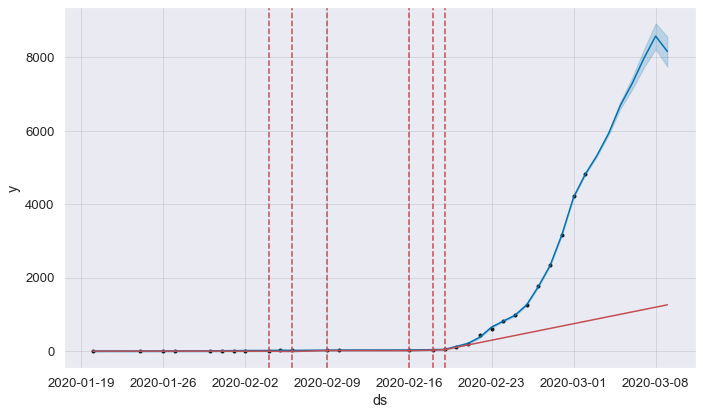

In [129]:
from fbprophet.plot import add_changepoints_to_plot

fig = prophet.plot(forecast_data)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast_data)

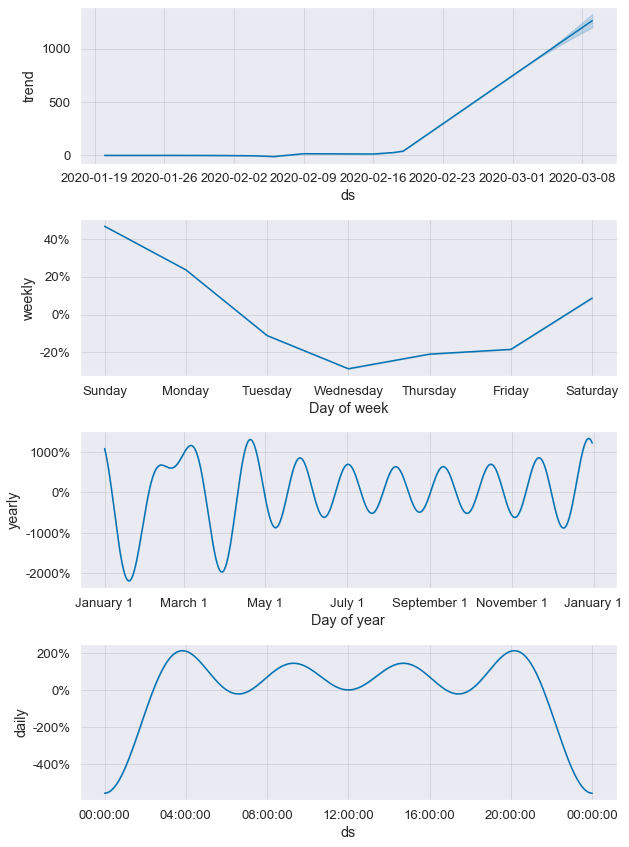

In [130]:
fig1 = prophet.plot_components(forecast_data)

- 1번 그래프는 시계열 데이터의 전체적인 트렌드를 보여주고
- 2번 그래프는 weekly 트렌드를
- 3번 그래프는 yearly 트렌드를
- 마지막 4번 그래프는 daily 트렌드를 보여준다

데이터를 간단히 정제해보고 각 컬럼별로 시각화를 해봤습니다.  
다음에는 컬럼 간의 관계와 통계 분석을 통해 좀 더 깊게 파보겠습니다.